In [1]:
# DS Libraries
import pandas as pd
import numpy as np
from scipy import stats
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# knn submodules from scikit learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

# Data Acquisition
from pydataset import data
import env
import acquire as acq
import prepare as prp

In [2]:
# load telco via acquire.py
df = acq.new_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,3,1,3,2162-FRZAA,Male,0,Yes,Yes,63,No,...,Yes,No,No,No,39.35,2395.05,No,Two year,DSL,Bank transfer (automatic)
1,4,1,3,2160-GPFXD,Male,0,Yes,Yes,54,Yes,...,Yes,No,No,Yes,65.65,3566.7,No,Two year,DSL,Credit card (automatic)
2,2,1,2,2157-MXBJS,Male,0,Yes,No,13,Yes,...,No,Yes,Yes,Yes,75.30,989.45,Yes,One year,DSL,Mailed check
3,4,1,1,2155-AMQRX,Female,0,No,No,28,Yes,...,Yes,No,No,Yes,54.90,1505.15,No,Month-to-month,DSL,Credit card (automatic)
4,3,1,2,2150-WLKUW,Female,0,Yes,No,40,Yes,...,No,Yes,No,No,63.90,2635,No,One year,DSL,Bank transfer (automatic)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [ ]:
df.payment_type_id.value_counts(normalize=True)

In [4]:
df.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type'],
      dtype='object')

In [5]:
#drop out any redundant, excessively empty, or bad columns
df = df.drop(columns=['total_charges','payment_type_id','internet_service_type_id','contract_type_id','customer_id'])
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,churn,contract_type,internet_service_type,payment_type
0,Male,0,Yes,Yes,63,No,No phone service,No,Yes,Yes,Yes,No,No,No,39.35,No,Two year,DSL,Bank transfer (automatic)
1,Male,0,Yes,Yes,54,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,65.65,No,Two year,DSL,Credit card (automatic)
2,Male,0,Yes,No,13,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,75.30,Yes,One year,DSL,Mailed check
3,Female,0,No,No,28,Yes,Yes,No,No,No,Yes,No,No,Yes,54.90,No,Month-to-month,DSL,Credit card (automatic)
4,Female,0,Yes,No,40,Yes,Yes,No,Yes,No,No,Yes,No,No,63.90,No,One year,DSL,Bank transfer (automatic)


In [6]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'churn', 'contract_type',
       'internet_service_type', 'payment_type'],
      dtype='object')

In [7]:
for col in df.columns:
    print(df[col].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: senior_citizen, dtype: int64
No     3641
Yes    3402
Name: partner, dtype: int64
No     4933
Yes    2110
Name: dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
9     119
70    119
12    117
10    116
6     110
13    109
68    100
11     99
15     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
56     80
64     80
52     80
25     79
26     79
14     76
65     76
61     76
60     76
46     74
19     73
63     72
30     72
27     72
29     72
20     71
62     70
41     70
53     70
32     69
54     68
51     68
50     68
47     68
58     67
49     66
43     65
57     65
31     65
37     65
42     65
34     65
55     64
33     64
48     64
40     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: tenure, dtype: int64
Yes    6361
No      682


In [8]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))

Male      0.504756
Female    0.495244
Name: gender, dtype: float64
0    0.837853
1    0.162147
Name: senior_citizen, dtype: float64
No     0.516967
Yes    0.483033
Name: partner, dtype: float64
No     0.700412
Yes    0.299588
Name: dependents, dtype: float64
1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
71    0.024137
5     0.018884
7     0.018600
8     0.017464
9     0.016896
70    0.016896
12    0.016612
10    0.016470
6     0.015618
13    0.015476
68    0.014198
11    0.014057
15    0.014057
67    0.013915
18    0.013773
69    0.013489
24    0.013347
22    0.012779
66    0.012637
35    0.012495
17    0.012353
23    0.012069
16    0.011359
56    0.011359
64    0.011359
52    0.011359
25    0.011217
26    0.011217
14    0.010791
65    0.010791
61    0.010791
60    0.010791
46    0.010507
19    0.010365
63    0.010223
30    0.010223
27    0.010223
29    0.010223
20    0.010081
62    0.009939
41    0.009939
53    0.009939
32    0.009797
54    0.009655
51    

In [9]:
# Lets Run some CHi2 Tests:

#CONTRACT TYPE
df[['contract_type','churn']]

,contract_type,churn
0,Two year,No
1,Two year,No
2,One year,Yes
3,Month-to-month,No
4,One year,No
...,...,...
7038,Month-to-month,No
7039,Two year,No
7040,Two year,No
7041,Two year,No


In [10]:
df_contract_x =pd.crosstab(df['contract_type'],df['churn'])
df_contract_x

churn,No,Yes
contract_type,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [11]:
stats.chi2_contingency(df_contract_x)

(1184.5965720837926,
 5.863038300673391e-258,
 2,
 array([[2846.69175067, 1028.30824933],
        [1082.11018032,  390.88981968],
        [1245.198069  ,  449.801931  ]]))

In [12]:
# Lets Run some CHi2 Tests:

#DEPENDENTS
df[['dependents','churn']]

,dependents,churn
0,Yes,No
1,Yes,No
2,No,Yes
3,No,No
4,No,No
...,...,...
7038,No,No
7039,Yes,No
7040,Yes,No
7041,No,No


In [13]:
df_dependents_x =pd.crosstab(df['dependents'],df['churn'])
df_dependents_x

churn,No,Yes
dependents,,
No,3390,1543
Yes,1784,326


In [14]:
stats.chi2_contingency(df_dependents_x)

(189.12924940423474,
 4.9249216612154196e-43,
 1,
 array([[3623.93042737, 1309.06957263],
        [1550.06957263,  559.93042737]]))

In [15]:
# Lets Run some CHi2 Tests:

#PAPERLESS
df[['paperless_billing','churn']]

,paperless_billing,churn
0,No,No
1,Yes,No
2,Yes,Yes
3,Yes,No
4,No,No
...,...,...
7038,No,No
7039,No,No
7040,No,No
7041,No,No


In [16]:
df_paperless_x =pd.crosstab(df['paperless_billing'],df['churn'])
df_paperless_x

churn,No,Yes
paperless_billing,,
No,2403,469
Yes,2771,1400


In [17]:
stats.chi2_contingency(df_paperless_x)

(258.27764906707307,
 4.073354668665985e-58,
 1,
 array([[2109.85773108,  762.14226892],
        [3064.14226892, 1106.85773108]]))

In [18]:
# Lets Run some CHi2 Tests:

#GENDER
df[['gender','churn']]

,gender,churn
0,Male,No
1,Male,No
2,Male,Yes
3,Female,No
4,Female,No
...,...,...
7038,Male,No
7039,Male,No
7040,Male,No
7041,Female,No


In [19]:
df_gender_x =pd.crosstab(df['gender'],df['churn'])
df_gender_x

churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [20]:
stats.chi2_contingency(df_gender_x)

(0.4840828822091383,
 0.48657873605618596,
 1,
 array([[2562.38989067,  925.61010933],
        [2611.61010933,  943.38989067]]))

In [21]:
# Lets Run some CHi2 Tests:

#SENIOR CITIZEN
df[['senior_citizen','churn']]

,senior_citizen,churn
0,0,No
1,0,No
2,0,Yes
3,0,No
4,0,No
...,...,...
7038,0,No
7039,0,No
7040,0,No
7041,0,No


In [22]:
df_senior_x =pd.crosstab(df['senior_citizen'],df['churn'],margins=True)
df_senior_x

churn,No,Yes,All
senior_citizen,,,
0,4508,1393,5901
1,666,476,1142
All,5174,1869,7043


In [23]:
stats.chi2_contingency(df_senior_x)

(160.35213184520632,
 1.2285843790939117e-33,
 4,
 array([[4335.05239245, 1565.94760755, 5901.        ],
        [ 838.94760755,  303.05239245, 1142.        ],
        [5174.        , 1869.        , 7043.        ]]))

In [24]:
# Lets Run some CHi2 Tests:

#PARTNER
df[['partner','churn']]

,partner,churn
0,Yes,No
1,Yes,No
2,Yes,Yes
3,No,No
4,Yes,No
...,...,...
7038,No,No
7039,Yes,No
7040,Yes,No
7041,No,No


In [25]:
df_partner_x =pd.crosstab(df['partner'],df['churn'])
df_partner_x

churn,No,Yes
partner,,
No,2441,1200
Yes,2733,669


In [26]:
stats.chi2_contingency(df_partner_x)

(158.7333820309922,
 2.1399113440759935e-36,
 1,
 array([[2674.78830044,  966.21169956],
        [2499.21169956,  902.78830044]]))

In [27]:
# Lets Run some CHi2 Tests:

#PAYMENT_TYPE
df[['payment_type','churn']]

,payment_type,churn
0,Bank transfer (automatic),No
1,Credit card (automatic),No
2,Mailed check,Yes
3,Credit card (automatic),No
4,Bank transfer (automatic),No
...,...,...
7038,Mailed check,No
7039,Mailed check,No
7040,Credit card (automatic),No
7041,Mailed check,No


In [33]:
df_payment_x =pd.crosstab(df['payment_type'],df['churn'],margins=True)
df_payment_x

churn,No,Yes,All
payment_type,,,
Bank transfer (automatic),1286,258,1544
Credit card (automatic),1290,232,1522
Electronic check,1294,1071,2365
Mailed check,1304,308,1612
All,5174,1869,7043


In [29]:
stats.chi2_contingency(df_payment_x)

(648.1423274814,
 3.6823546520097993e-140,
 3,
 array([[1134.26891949,  409.73108051],
        [1118.10705665,  403.89294335],
        [1737.40025557,  627.59974443],
        [1184.22376828,  427.77623172]]))

In [30]:
# SPLIT

def split_telco_data(df, target='churn'):
    '''
    split data will split data based on 
    the values present in a cleaned version
    
    '''
    train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=2013,
                                   stratify=df[target])
    train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=2013,
                                   stratify=train_val[target])
    return train, validate, test

In [31]:
train, validate, test = split_telco_data(df,target='churn')

In [32]:
train.shape, validate.shape, test.shape

((3943, 19), (1691, 19), (1409, 19))

In [35]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,churn,contract_type,internet_service_type,payment_type
1166,Female,0,No,No,35,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,23.30,No,Two year,None,Bank transfer (automatic)
4411,Male,0,Yes,No,42,No,No phone service,No,No,No,No,No,No,Yes,25.10,No,Month-to-month,DSL,Credit card (automatic)
2873,Female,0,No,No,9,Yes,No,No,No,Yes,No,No,Yes,Yes,85.30,No,Month-to-month,Fiber optic,Credit card (automatic)
1374,Male,0,No,No,4,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.65,No,Month-to-month,None,Mailed check
43,Female,0,Yes,No,65,Yes,No,No,No,No,Yes,Yes,No,Yes,59.80,No,Two year,DSL,Credit card (automatic)


In [36]:
cat_cols, num_cols = [], []
for col in train.columns:
    if train[col].dtype == 'O':
        cat_cols.append(col)
    else:
        if train[col].nunique() < 10:
            cat_cols.append(col)
        else:
            num_cols.append(col)

In [39]:
cat_cols

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [40]:
num_cols

['tenure', 'monthly_charges']

In [ ]:
#THIS IS FOR TRAIN
for col in cat_cols:
    print(f'Univariate assessment of feature {col}:')
    sns.countplot(data=train, x=col)
    plt.show()
    print(
        pd.concat([train[col].value_counts(),
        train[col].value_counts(normalize=True)],
             axis=1))

Univariate assessment of feature gender:


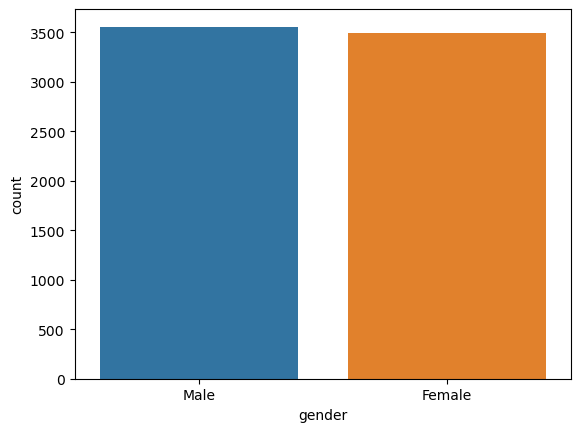

        gender    gender
Male      3555  0.504756
Female    3488  0.495244
Univariate assessment of feature senior_citizen:


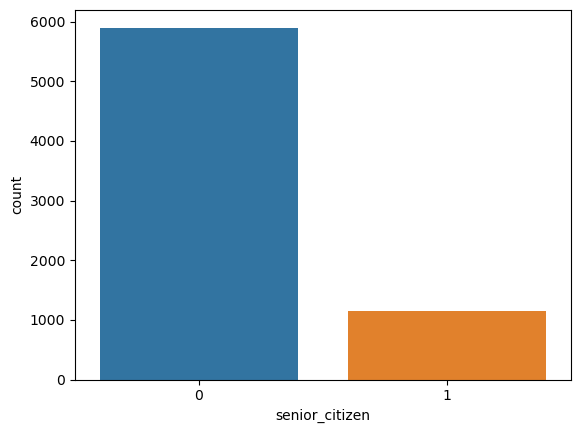

   senior_citizen  senior_citizen
0            5901        0.837853
1            1142        0.162147
Univariate assessment of feature partner:


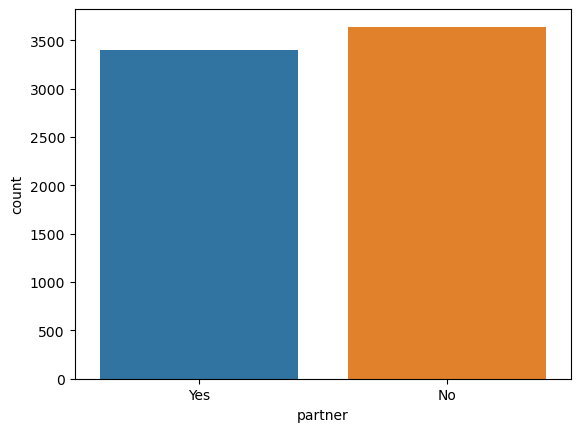

     partner   partner
No      3641  0.516967
Yes     3402  0.483033
Univariate assessment of feature dependents:


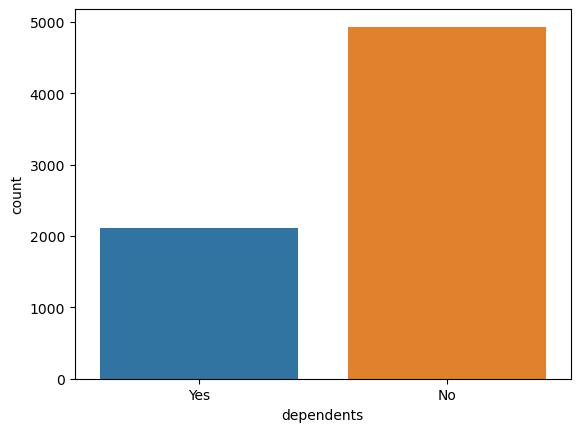

     dependents  dependents
No         4933    0.700412
Yes        2110    0.299588
Univariate assessment of feature phone_service:


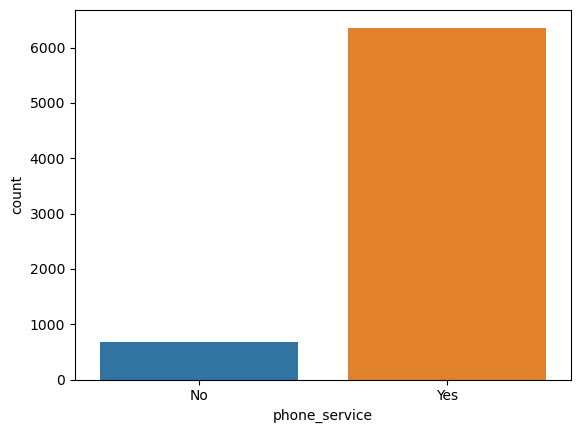

     phone_service  phone_service
Yes           6361       0.903166
No             682       0.096834
Univariate assessment of feature multiple_lines:


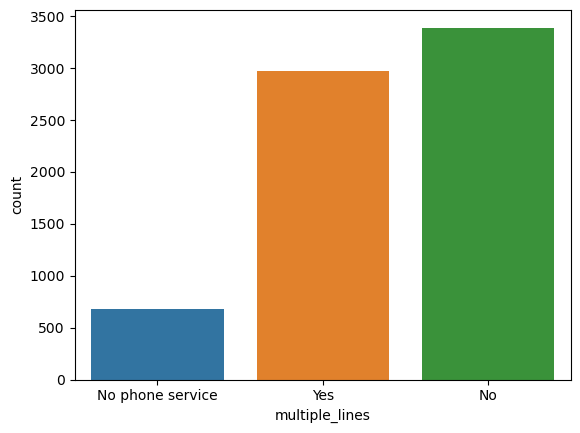

                  multiple_lines  multiple_lines
No                          3390        0.481329
Yes                         2971        0.421837
No phone service             682        0.096834
Univariate assessment of feature online_security:


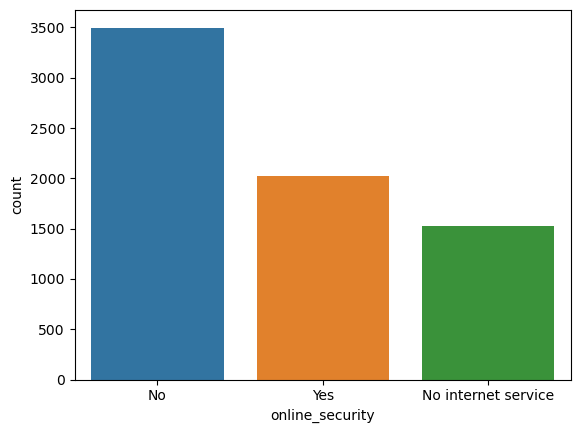

                     online_security  online_security
No                              3498         0.496663
Yes                             2019         0.286668
No internet service             1526         0.216669
Univariate assessment of feature online_backup:


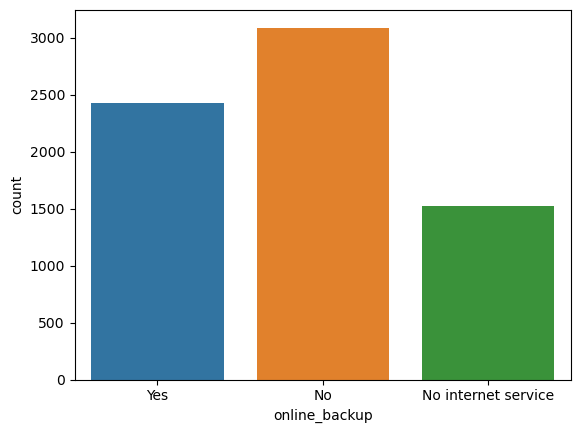

                     online_backup  online_backup
No                            3088       0.438450
Yes                           2429       0.344881
No internet service           1526       0.216669
Univariate assessment of feature device_protection:


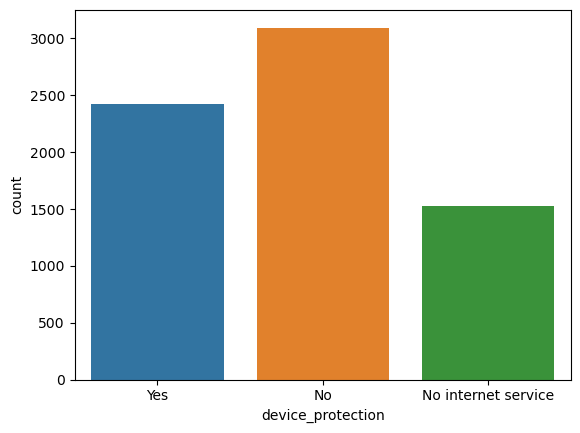

                     device_protection  device_protection
No                                3095           0.439443
Yes                               2422           0.343888
No internet service               1526           0.216669
Univariate assessment of feature tech_support:


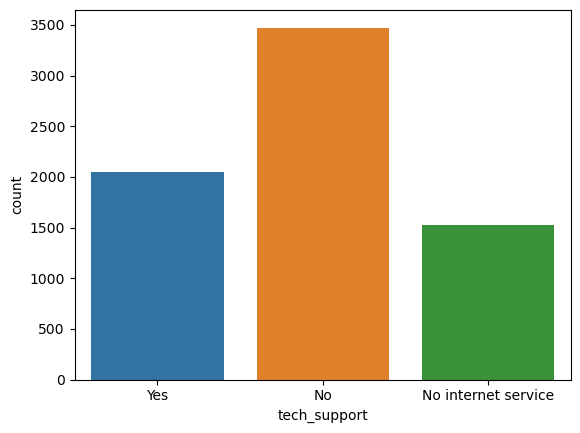

                     tech_support  tech_support
No                           3473      0.493114
Yes                          2044      0.290217
No internet service          1526      0.216669
Univariate assessment of feature streaming_tv:


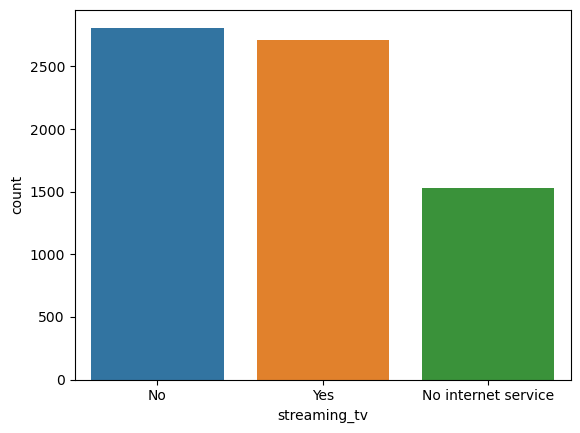

                     streaming_tv  streaming_tv
No                           2810      0.398978
Yes                          2707      0.384353
No internet service          1526      0.216669
Univariate assessment of feature streaming_movies:


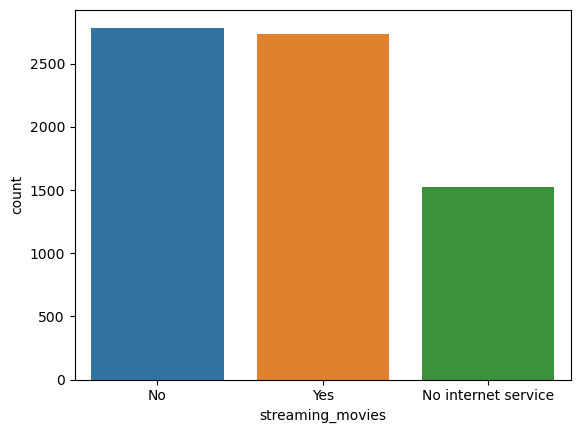

                     streaming_movies  streaming_movies
No                               2785          0.395428
Yes                              2732          0.387903
No internet service              1526          0.216669
Univariate assessment of feature paperless_billing:


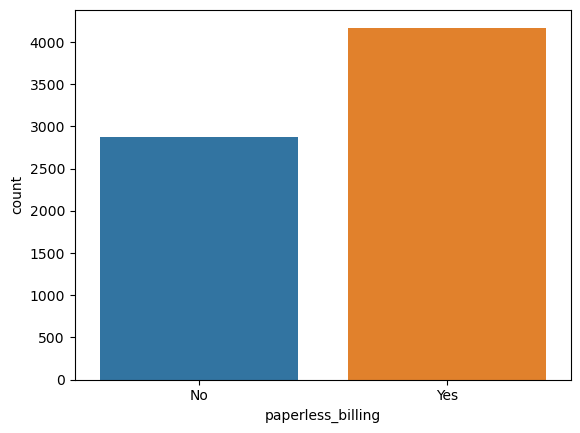

     paperless_billing  paperless_billing
Yes               4171           0.592219
No                2872           0.407781
Univariate assessment of feature churn:


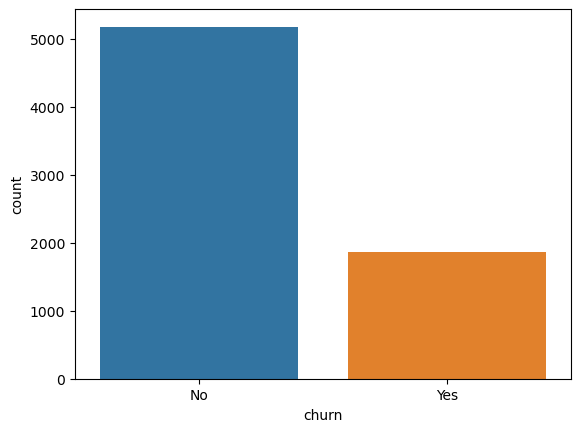

     churn    churn
No    5174  0.73463
Yes   1869  0.26537
Univariate assessment of feature contract_type:


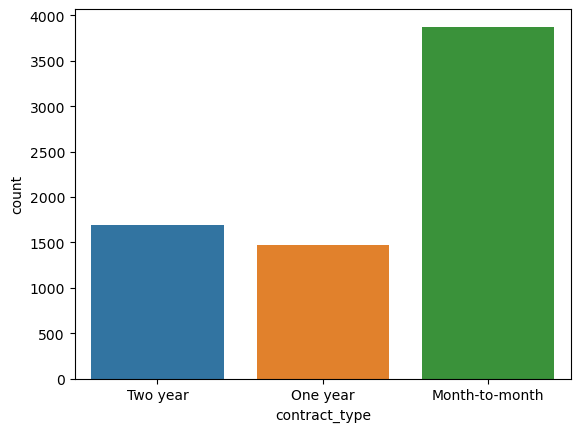

                contract_type  contract_type
Month-to-month           3875       0.550192
Two year                 1695       0.240664
One year                 1473       0.209144
Univariate assessment of feature internet_service_type:


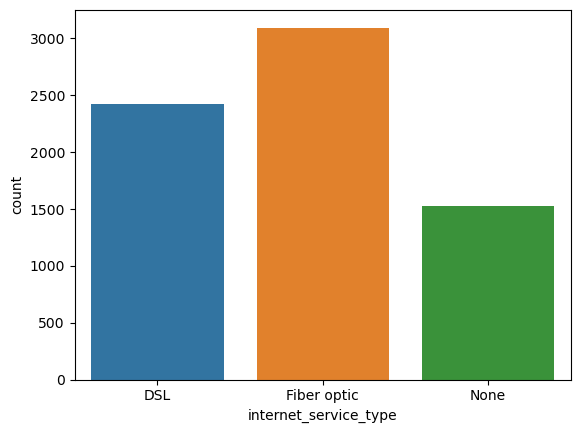

             internet_service_type  internet_service_type
Fiber optic                   3096               0.439585
DSL                           2421               0.343746
None                          1526               0.216669
Univariate assessment of feature payment_type:


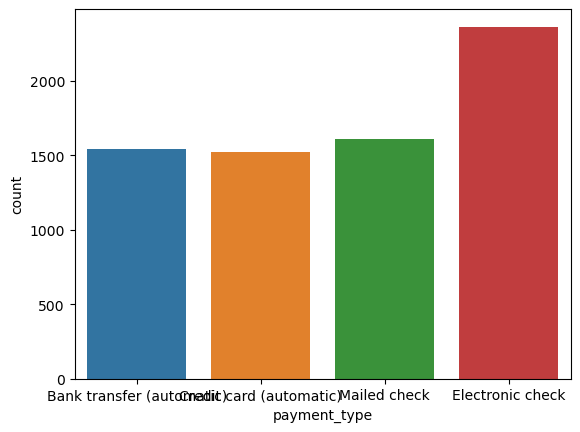

                           payment_type  payment_type
Electronic check                   2365      0.335794
Mailed check                       1612      0.228880
Bank transfer (automatic)          1544      0.219225
Credit card (automatic)            1522      0.216101


In [42]:
# THIS IS FOR DF
for col in cat_cols:
    print(f'Univariate assessment of feature {col}:')
    sns.countplot(data=df, x=col)
    plt.show()
    print(
        pd.concat([df[col].value_counts(),
        df[col].value_counts(normalize=True)],
             axis=1))

In [76]:
train.describe()

,senior_citizen,tenure,monthly_charges
count,3943.000000,3943.000000,3943.000000
mean,0.162820,32.244230,64.802384
std,0.369248,24.379097,30.169969
min,0.000000,0.000000,18.750000
25%,0.000000,9.000000,35.400000
50%,0.000000,29.000000,70.600000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
for col in cat_cols:
    if col != 'churn':
        sns.barplot(data=train,
                    x=col,
                    y ='churn',
                   ci=False)
        plt.title(f'Customer CHURN based on {col}')
        plt.show()

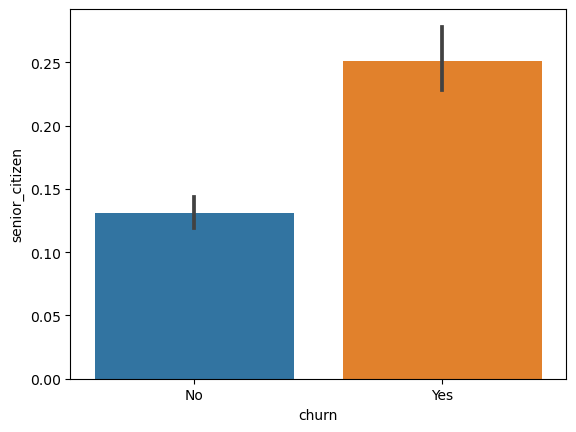

In [78]:
sns.barplot(y='senior_citizen',x='churn',data=train)
plt.show()

In [43]:
# Lets Run some CHi2 Tests:

#CONTRACT TYPE
train[['contract_type','churn']]

,contract_type,churn
1166,Two year,No
4411,Month-to-month,No
2873,Month-to-month,No
1374,Month-to-month,No
43,Two year,No
...,...,...
1081,Month-to-month,No
6678,Two year,No
5686,Two year,No
6820,Month-to-month,No


In [48]:
df_contract_x =pd.crosstab(train['contract_type'],train['churn'])
df_contract_x

churn,No,Yes
contract_type,,
Month-to-month,1241,920
One year,715,98
Two year,941,28


In [46]:
stats.chi2_contingency(train_contract_x)

(650.6166776362104,
 2.7964944511545704e-137,
 6,
 array([[1587.72939386,  573.27060614, 2161.        ],
        [ 597.32716206,  215.67283794,  813.        ],
        [ 711.94344408,  257.05655592,  969.        ],
        [2897.        , 1046.        , 3943.        ]]))

In [47]:
# Lets Run some CHi2 Tests:

#DEPENDENTS
train[['dependents','churn']]

,dependents,churn
1166,No,No
4411,No,No
2873,No,No
1374,No,No
43,No,No
...,...,...
1081,Yes,No
6678,Yes,No
5686,Yes,No
6820,No,No


In [50]:
df_dependents_x =pd.crosstab(train['dependents'],train['churn'],margins=True)
df_dependents_x

churn,No,Yes,All
dependents,,,
No,1910,858,2768
Yes,987,188,1175
All,2897,1046,3943


In [51]:
stats.chi2_contingency(df_dependents_x)

(95.18438178355419,
 1.0412154283328868e-19,
 4,
 array([[2033.70428608,  734.29571392, 2768.        ],
        [ 863.29571392,  311.70428608, 1175.        ],
        [2897.        , 1046.        , 3943.        ]]))

In [52]:
# Lets Run some CHi2 Tests:

#PAPERLESS
train[['paperless_billing','churn']]

,paperless_billing,churn
1166,No,No
4411,Yes,No
2873,Yes,No
1374,Yes,No
43,Yes,No
...,...,...
1081,No,No
6678,No,No
5686,No,No
6820,No,No


In [55]:
df_paperless_x =pd.crosstab(train['paperless_billing'],train['churn'])
df_paperless_x

churn,No,Yes
paperless_billing,,
No,1336,269
Yes,1561,777


In [56]:
stats.chi2_contingency(df_paperless_x)

(131.66139738100526,
 1.7744488509875074e-30,
 1,
 array([[1179.22520923,  425.77479077],
        [1717.77479077,  620.22520923]]))

In [57]:
# Lets Run some CHi2 Tests:

#GENDER
train[['gender','churn']]

,gender,churn
1166,Female,No
4411,Male,No
2873,Female,No
1374,Male,No
43,Female,No
...,...,...
1081,Female,No
6678,Male,No
5686,Female,No
6820,Female,No


In [58]:
df_gender_x =pd.crosstab(train['gender'],train['churn'])
df_gender_x

churn,No,Yes
gender,,
Female,1416,530
Male,1481,516


In [59]:
stats.chi2_contingency(df_gender_x)

(0.9159475236298575,
 0.33854127483141705,
 1,
 array([[1429.76464621,  516.23535379],
        [1467.23535379,  529.76464621]]))

In [60]:
# Lets Run some CHi2 Tests:

#SENIOR CITIZEN
train[['senior_citizen','churn']]

,senior_citizen,churn
1166,0,No
4411,0,No
2873,0,No
1374,0,No
43,0,No
...,...,...
1081,0,No
6678,0,No
5686,0,No
6820,0,No


In [62]:
df_senior_x =pd.crosstab(train['senior_citizen'],train['churn'])
df_senior_x

churn,No,Yes
senior_citizen,,
0,2518,783
1,379,263


In [63]:
stats.chi2_contingency(df_senior_x)

(81.1312220350024,
 2.1121645962713915e-19,
 1,
 array([[2425.30991631,  875.69008369],
        [ 471.69008369,  170.30991631]]))

In [64]:
# Lets Run some CHi2 Tests:

#PARTNER
train[['partner','churn']]

,partner,churn
1166,No,No
4411,Yes,No
2873,No,No
1374,No,No
43,Yes,No
...,...,...
1081,Yes,No
6678,Yes,No
5686,Yes,No
6820,No,No


In [66]:
df_partner_x =pd.crosstab(train['partner'],train['churn'])
df_partner_x

churn,No,Yes
partner,,
No,1364,669
Yes,1533,377


In [67]:
stats.chi2_contingency(df_partner_x)

(86.94715312061643,
 1.1146002156273985e-20,
 1,
 array([[1493.68526503,  539.31473497],
        [1403.31473497,  506.68526503]]))

In [68]:
# Lets Run some CHi2 Tests:

#PAYMENT_TYPE
train[['payment_type','churn']]

,payment_type,churn
1166,Bank transfer (automatic),No
4411,Credit card (automatic),No
2873,Credit card (automatic),No
1374,Mailed check,No
43,Credit card (automatic),No
...,...,...
1081,Mailed check,No
6678,Credit card (automatic),No
5686,Credit card (automatic),No
6820,Credit card (automatic),No


In [70]:
df_payment_x =pd.crosstab(train['payment_type'],train['churn'])
df_payment_x

churn,No,Yes
payment_type,,
Bank transfer (automatic),734,146
Credit card (automatic),704,128
Electronic check,751,610
Mailed check,708,162


In [71]:
stats.chi2_contingency(df_payment_x)

(359.1428664101252,
 1.5627711225751631e-77,
 3,
 array([[646.55338575, 233.44661425],
        [611.28683743, 220.71316257],
        [999.95358864, 361.04641136],
        [639.20618818, 230.79381182]]))